<a href="https://colab.research.google.com/github/AhmadIsmail83N/MyData/blob/master/Lab4_MMO_26042020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Подключим все необходимые библиотеки и настроим отображение графиков [2,3]

In [0]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, RepeatedKFold, ShuffleSplit
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
# Enable inline plots
%matplotlib inline
# Set plots formats to save high resolution PNG
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")


Зададим ширину текстового представления данных, чтобы в дальнейшем текст в отчёте влезал на *А4* 



In [0]:
pd.set_option("display.width", 70)

**3.1. Предварительная подготовка данных**

В качестве набора данных используются метрологические данные с метеостанции
HI-SEAS (Hawaii Space Exploration Analog and Simulation) за четыре месяца (с сентября
по декабрь 2016 года) 

In [0]:
data = pd.read_csv("/content/sample_data/MapData-Evans-GP.csv")

In [4]:
data.dtypes

Latitude °               int64
Latitude                object
Longitude °              int64
Longitude               object
Topography              object
Difficulty Challenge     int64
Altitude                 int64
Temperature              int64
Metals                   int64
Rare Metals              int64
Concrete                 int64
Water                    int64
Dust Devils              int64
Dust Storms              int64
Meteors                  int64
Cold Waves               int64
Map Name                object
Named Location          object
Breakthrough 1          object
Breakthrough 2          object
Breakthrough 3          object
Breakthrough 4          object
Breakthrough 5          object
Breakthrough 6          object
Breakthrough 7          object
Breakthrough 8          object
Breakthrough 9          object
Breakthrough 10         object
Breakthrough 11         object
Breakthrough 12         object
Breakthrough 13         object
Breakthrough 14         object
Breakthr

Посмотрим на данные в данном наборе данных:

In [5]:
data.head()

,Latitude °,Latitude,Longitude °,Longitude,Topography,Difficulty Challenge,Altitude,Temperature,Metals,Rare Metals,Concrete,Water,Dust Devils,Dust Storms,Meteors,Cold Waves,Map Name,Named Location,Breakthrough 1,Breakthrough 2,Breakthrough 3,Breakthrough 4,Breakthrough 5,Breakthrough 6,Breakthrough 7,Breakthrough 8,Breakthrough 9,Breakthrough 10,Breakthrough 11,Breakthrough 12,Breakthrough 13,Breakthrough 14,Breakthrough 15,Breakthrough 16,Breakthrough 17
0,0,S,0,E,Relatively Flat,140,-929,-1,2,2,4,1,2,1,4,1,BlankBigCliffsCMix_02,NaN,Martianborn Ingenuity,Vocation-Oriented Society,Martian Diet,Giant Crops,Rapid Sleep,Superfungus,Hypersensitive Photovoltaics,Superconducting Computing,Construction Nanites,Multispiral Architecture,Core Metals,Cloning,Cryo-sleep,Resilient Vegetation,Landscaping Nanites,Alien Imprints,Zero-Space Computing
1,0,S,1,E,Relatively Flat,100,-1160,-1,2,2,4,1,2,1,4,1,BlankBig_03,NaN,Frictionless Composites,Printed Electronics,Autonomous Hubs,Landscaping Nanites,Hypersensitive Photovoltaics,Extractor AI,Sustained Workload,Martian Diet,Resilient Vegetation,Construction Nanites,Core Rare Metals,Dry Farming,Superconducting Computing,Martianborn Ingenuity,Designed Forestation,Cloning,Service Bots
2,0,S,1,W,Relatively Flat,100,-1160,-3,2,2,4,1,2,2,4,1,BlankBig_01,NaN,Safe Mode,Artificial Muscles,Landscaping Nanites,Alien Imprints,Vocation-Oriented Society,Neural Empathy,Neo-Concrete,Frictionless Composites,Dry Farming,Martian Diet,Nocturnal Adaptation,Prefab Compression,Magnetic Extraction,Martian Steel,Hive Mind,Nano Refinement,Extractor AI
3,0,S,2,E,Relatively Flat,140,-1160,-1,2,2,4,1,2,1,4,1,BlankBigTerraceCMix_16,NaN,Dome Streamlining,Autonomous Hubs,Safe Mode,Prefab Compression,Magnetic Extraction,Overcharge Amplifications,Dry Farming,Alien Imprints,Inspiring Architecture,Ancient Terraforming Device,Nocturnal Adaptation,Good Vibrations,Nano Refinement,Superconducting Computing,Multispiral Architecture,Plasma Rocket,Superior Cables
4,0,S,2,W,Relatively Flat,100,-929,-3,2,2,4,1,2,3,4,1,BlankBig_01,NaN,Vector Pump,Construction Nanites,Plutonium Synthesis,Landscaping Nanites,Extractor AI,Superconducting Computing,Dry Farming,Neural Empathy,Overcharge Amplifications,Dome Streamlining,Nano Refinement,Nocturnal Adaptation,Zero-Space Computing,Eternal Fusion,Giant Crops,Magnetic Extraction,Core Metals


Convert Temperature (° F)   to Temperature (C)  

In [0]:
def TempreatureCToF(t):
  return t*9/5 +32

In [7]:
df = data.copy()
df["Tempreature(F)"]=TempreatureCToF(df["Temperature"])
df.head()

,Latitude °,Latitude,Longitude °,Longitude,Topography,Difficulty Challenge,Altitude,Temperature,Metals,Rare Metals,Concrete,Water,Dust Devils,Dust Storms,Meteors,Cold Waves,Map Name,Named Location,Breakthrough 1,Breakthrough 2,Breakthrough 3,Breakthrough 4,Breakthrough 5,Breakthrough 6,Breakthrough 7,Breakthrough 8,Breakthrough 9,Breakthrough 10,Breakthrough 11,Breakthrough 12,Breakthrough 13,Breakthrough 14,Breakthrough 15,Breakthrough 16,Breakthrough 17,Tempreature(F)
0,0,S,0,E,Relatively Flat,140,-929,-1,2,2,4,1,2,1,4,1,BlankBigCliffsCMix_02,NaN,Martianborn Ingenuity,Vocation-Oriented Society,Martian Diet,Giant Crops,Rapid Sleep,Superfungus,Hypersensitive Photovoltaics,Superconducting Computing,Construction Nanites,Multispiral Architecture,Core Metals,Cloning,Cryo-sleep,Resilient Vegetation,Landscaping Nanites,Alien Imprints,Zero-Space Computing,30.2
1,0,S,1,E,Relatively Flat,100,-1160,-1,2,2,4,1,2,1,4,1,BlankBig_03,NaN,Frictionless Composites,Printed Electronics,Autonomous Hubs,Landscaping Nanites,Hypersensitive Photovoltaics,Extractor AI,Sustained Workload,Martian Diet,Resilient Vegetation,Construction Nanites,Core Rare Metals,Dry Farming,Superconducting Computing,Martianborn Ingenuity,Designed Forestation,Cloning,Service Bots,30.2
2,0,S,1,W,Relatively Flat,100,-1160,-3,2,2,4,1,2,2,4,1,BlankBig_01,NaN,Safe Mode,Artificial Muscles,Landscaping Nanites,Alien Imprints,Vocation-Oriented Society,Neural Empathy,Neo-Concrete,Frictionless Composites,Dry Farming,Martian Diet,Nocturnal Adaptation,Prefab Compression,Magnetic Extraction,Martian Steel,Hive Mind,Nano Refinement,Extractor AI,26.6
3,0,S,2,E,Relatively Flat,140,-1160,-1,2,2,4,1,2,1,4,1,BlankBigTerraceCMix_16,NaN,Dome Streamlining,Autonomous Hubs,Safe Mode,Prefab Compression,Magnetic Extraction,Overcharge Amplifications,Dry Farming,Alien Imprints,Inspiring Architecture,Ancient Terraforming Device,Nocturnal Adaptation,Good Vibrations,Nano Refinement,Superconducting Computing,Multispiral Architecture,Plasma Rocket,Superior Cables,30.2
4,0,S,2,W,Relatively Flat,100,-929,-3,2,2,4,1,2,3,4,1,BlankBig_01,NaN,Vector Pump,Construction Nanites,Plutonium Synthesis,Landscaping Nanites,Extractor AI,Superconducting Computing,Dry Farming,Neural Empathy,Overcharge Amplifications,Dome Streamlining,Nano Refinement,Nocturnal Adaptation,Zero-Space Computing,Eternal Fusion,Giant Crops,Magnetic Extraction,Core Metals,26.6


In [8]:
df.dtypes

Latitude °                int64
Latitude                 object
Longitude °               int64
Longitude                object
Topography               object
Difficulty Challenge      int64
Altitude                  int64
Temperature               int64
Metals                    int64
Rare Metals               int64
Concrete                  int64
Water                     int64
Dust Devils               int64
Dust Storms               int64
Meteors                   int64
Cold Waves                int64
Map Name                 object
Named Location           object
Breakthrough 1           object
Breakthrough 2           object
Breakthrough 3           object
Breakthrough 4           object
Breakthrough 5           object
Breakthrough 6           object
Breakthrough 7           object
Breakthrough 8           object
Breakthrough 9           object
Breakthrough 10          object
Breakthrough 11          object
Breakthrough 12          object
Breakthrough 13          object
Breakthr

С такими данными уже можно работать. Проверим размер набора данных:

In [9]:
df.shape

(50901, 36)

Проверим основные статистические характеристики набора данных:

In [10]:
df.describe()

,Latitude °,Longitude °,Difficulty Challenge,Altitude,Temperature,Metals,Rare Metals,Concrete,Water,Dust Devils,Dust Storms,Meteors,Cold Waves,Tempreature(F)
count,50901.000000,50901.000000,50901.000000,50901.000000,50901.00000,50901.000000,50901.000000,50901.000000,50901.000000,50901.000000,50901.000000,50901.000000,50901.000000,50901.000000
mean,35.248227,90.249307,133.196204,-425.882576,-35.55828,2.434962,2.434962,2.207069,2.703287,1.675802,2.214416,2.120823,2.150744,-32.004904
std,20.352820,52.106773,34.572810,2927.879760,30.46709,0.784851,0.784851,1.141824,1.153535,0.648712,1.138605,0.971024,1.388051,54.840762
min,0.000000,0.000000,100.000000,-8200.000000,-100.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-148.000000
25%,18.000000,45.000000,100.000000,-3353.000000,-72.00000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,-97.600000
50%,35.000000,90.000000,140.000000,-121.000000,-15.00000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,5.000000
75%,53.000000,135.000000,140.000000,1840.000000,-15.00000,3.000000,3.000000,3.000000,4.000000,2.000000,3.000000,3.000000,4.000000,5.000000
max,70.000000,180.000000,240.000000,21229.000000,-1.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,30.200000


Проверим наличие пропусков в данных:

In [11]:
df.isnull().sum()

Latitude °                  0
Latitude                    0
Longitude °                 0
Longitude                   0
Topography                  0
Difficulty Challenge        0
Altitude                    0
Temperature                 0
Metals                      0
Rare Metals                 0
Concrete                    0
Water                       0
Dust Devils                 0
Dust Storms                 0
Meteors                     0
Cold Waves                  0
Map Name                    0
Named Location          38976
Breakthrough 1              0
Breakthrough 2              0
Breakthrough 3              0
Breakthrough 4              0
Breakthrough 5              0
Breakthrough 6              0
Breakthrough 7              0
Breakthrough 8              0
Breakthrough 9              0
Breakthrough 10             0
Breakthrough 11             0
Breakthrough 12             0
Breakthrough 13             0
Breakthrough 14             0
Breakthrough 15             0
Breakthrou

**3.2. Разделение данных**

Разделим данные на целевой столбец и признаки:

In [51]:
df.dtypes

Latitude °                int64
Latitude                 object
Longitude °               int64
Longitude                object
Topography               object
Difficulty Challenge      int64
Altitude                  int64
Temperature               int64
Metals                    int64
Rare Metals               int64
Concrete                  int64
Water                     int64
Dust Devils               int64
Dust Storms               int64
Meteors                   int64
Cold Waves                int64
Map Name                 object
Named Location           object
Breakthrough 1           object
Breakthrough 2           object
Breakthrough 3           object
Breakthrough 4           object
Breakthrough 5           object
Breakthrough 6           object
Breakthrough 7           object
Breakthrough 8           object
Breakthrough 9           object
Breakthrough 10          object
Breakthrough 11          object
Breakthrough 12          object
Breakthrough 13          object
Breakthr

In [0]:
 X = df.drop(["Difficulty Challenge","Dust Devils","Latitude","Longitude","Topography","Map Name",
              "Named Location","Breakthrough 1","Meteors","Cold Waves","Concrete","Tempreature(F)","Temperature",
              "Breakthrough 2","Breakthrough 3","Breakthrough 4","Breakthrough 5","Breakthrough 6",
              "Breakthrough 7","Breakthrough 8","Breakthrough 9","Breakthrough 10","Breakthrough 11",
              "Breakthrough 12","Breakthrough 13","Breakthrough 14","Breakthrough 15","Breakthrough 16",
              "Breakthrough 17"              
              ],axis=1)
 
y = df["Tempreature(F)"]

In [54]:
print(X.head(), "\n")
print(y.head())

   Latitude °  Longitude °  Altitude  Metals  Rare Metals  Water  Dust Storms
0           0            0      -929       2            2      1            1
1           0            1     -1160       2            2      1            1
2           0            1     -1160       2            2      1            2
3           0            2     -1160       2            2      1            1
4           0            2      -929       2            2      1            3 

0    30.2
1    30.2
2    26.6
3    30.2
4    26.6
Name: Tempreature(F), dtype: float64


In [55]:
 print(X.shape)
print(y.shape)

(50901, 7)
(50901,)


In [56]:
X.head()

,Latitude °,Longitude °,Altitude,Metals,Rare Metals,Water,Dust Storms
0,0,0,-929,2,2,1,1
1,0,1,-1160,2,2,1,1
2,0,1,-1160,2,2,1,2
3,0,2,-1160,2,2,1,1
4,0,2,-929,2,2,1,3


Предобработаем данные, чтобы методы работали лучше:

In [57]:
columns = X.columns
scaler = StandardScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X, columns=columns).describe()


,Latitude °,Longitude °,Altitude,Metals,Rare Metals,Water,Dust Storms
count,5.090100e+04,5.090100e+04,5.090100e+04,5.090100e+04,5.090100e+04,5.090100e+04,5.090100e+04
mean,-7.345066e-14,3.911398e-16,-2.837249e-14,-6.191969e-14,-6.191969e-14,2.848557e-13,-1.750037e-14
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-1.731877e+00,-1.732024e+00,-2.655230e+00,-1.828342e+00,-1.828342e+00,-1.476594e+00,-1.066593e+00
25%,-8.474696e-01,-8.684044e-01,-9.997494e-01,-5.542024e-01,-5.542024e-01,-6.096855e-01,-1.066593e+00
50%,-1.219631e-02,-4.784597e-03,1.041319e-01,-5.542024e-01,-5.542024e-01,2.572233e-01,-1.883167e-01
75%,8.722107e-01,8.588352e-01,7.739064e-01,7.199374e-01,7.199374e-01,1.124132e+00,6.899596e-01
max,1.707484e+00,1.722455e+00,7.396170e+00,1.994077e+00,1.994077e+00,1.124132e+00,1.568236e+00


In [58]:
pd.DataFrame(y, columns=columns).describe()

,Latitude °,Longitude °,Altitude,Metals,Rare Metals,Water,Dust Storms
count,0,0,0,0,0,0,0
unique,0,0,0,0,0,0,0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Разделим выборку на тренировочную и тестовую:

In [0]:
 X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.25, random_state=346705925)

In [60]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(38175, 7)
(12726, 7)
(38175,)
(12726,)


**3.3. Модель ближайших соседей для произвольно заданного гиперпараметра K**

Напишем функцию, которая считает метрики построенной модели:

In [0]:
def test_model(model):
  print("mean_absolute_error:",
  mean_absolute_error(y_test, model.predict(X_test)))
  print("median_absolute_error:",
  median_absolute_error(y_test, model.predict(X_test)))
  print("r2_score:",
  r2_score(y_test, model.predict(X_test)))

Попробуем метод ближайших соседей с гиперпараметром K = 5:

In [62]:
reg_5 = KNeighborsRegressor(n_neighbors=5)
reg_5.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

Проверим метрики построенной модели:

In [63]:
test_model(reg_5)

mean_absolute_error: 2.7600848656294215
median_absolute_error: 0.0
r2_score: 0.9821597871392004


**3.4. Использование кросс-валидации**

Проверим различные стратегии кросс-валидации. Для начала посмотрим классический K-fold:

In [64]:
 scores = cross_val_score(KNeighborsRegressor(n_neighbors=5), X, y,
cv=KFold(n_splits=10), scoring="r2")
print(scores)
print(scores.mean(), "±", scores.std())

[0.17626404 0.2931496  0.57836441 0.8246736  0.92953402 0.89564835
 0.82463454 0.78002489 0.94334315 0.81985568]
0.7065492286077506 ± 0.25616783121172404


In [65]:
scores = cross_val_score(KNeighborsRegressor(n_neighbors=5), X, y,
cv=RepeatedKFold(n_splits=5, n_repeats=2),
scoring="r2")
print(scores)
print(scores.mean(), "±", scores.std())

[0.98395929 0.98262252 0.98490856 0.98342454 0.98224064 0.98047329
 0.98520845 0.98426963 0.98149179 0.98434172]
0.9832940436994857 ± 0.0014678539243394358


In [66]:
scores = cross_val_score(KNeighborsRegressor(n_neighbors=5), X, y,
cv=ShuffleSplit(n_splits=10), scoring="r2")
print(scores)
print(scores.mean(), "±", scores.std())

[0.9858947  0.98662581 0.98204068 0.9868731  0.98508682 0.98298309
 0.98548452 0.98415403 0.98311727 0.98720183]
0.9849461853633837 ± 0.001705855682817297


**3.5. Подбор гиперпараметра K**

Введем список настраиваемых параметров:

In [67]:
n_range = np.array(range(1, 50, 2))
tuned_parameters = [{'n_neighbors': n_range}]
n_range

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])

Запустим подбор параметра:

In [0]:
gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters,cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)

In [69]:
gs.fit(X, y)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=None, train_size=None),
             error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=0)

In [70]:
gs.best_params_

{'n_neighbors': 3}

Проверим результаты при разных значения гиперпараметра на тренировочном наборе данных:

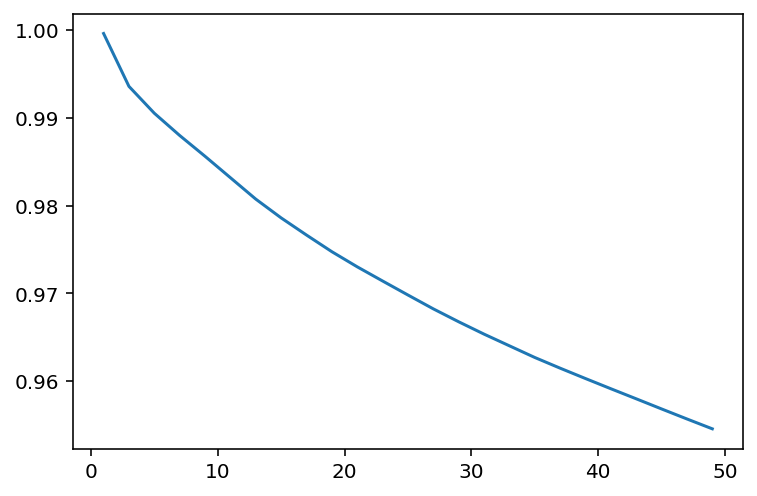

In [71]:
plt.plot(n_range, gs.cv_results_["mean_train_score"]);

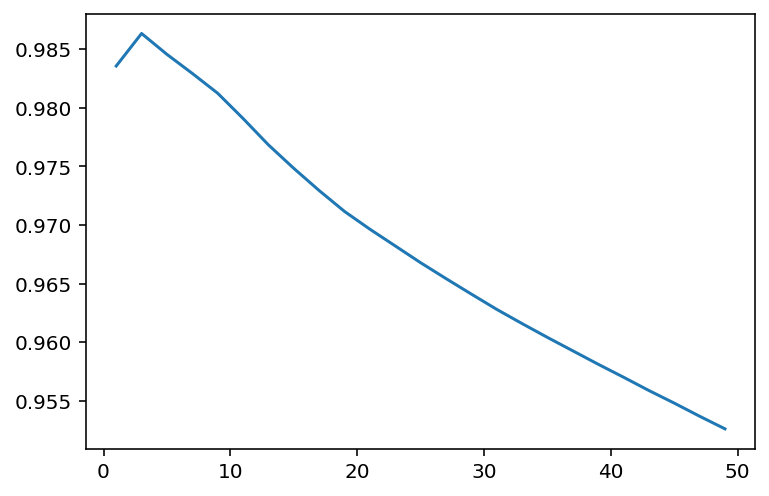

In [72]:
plt.plot(n_range, gs.cv_results_["mean_test_score"]);

In [74]:
reg = KNeighborsRegressor(**gs.best_params_)
reg.fit(X_train, y_train)
test_model(reg)

mean_absolute_error: 2.4478547854785493
median_absolute_error: 0.0
r2_score: 0.9839835814841862


In [0]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None):
  train_sizes=np.linspace(.1, 1.0, 5)
  plt.figure()
  plt.title(title)
  if ylim is not None:
    plt.ylim(*ylim)
  plt.xlabel("Training examples")
  plt.ylabel("Score")
  train_sizes, train_scores, test_scores = learning_curve(
  estimator, X, y, cv=cv, n_jobs=-1, train_sizes=train_sizes)
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)
  plt.grid()
  plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
  train_scores_mean + train_scores_std, alpha=0.1,
  color="r")
  plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
  test_scores_mean + test_scores_std, alpha=0.1,
  color="g")
  plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
  label="Training score")
  plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
  label="Cross-validation score")
  plt.legend(loc="best")
  return plt

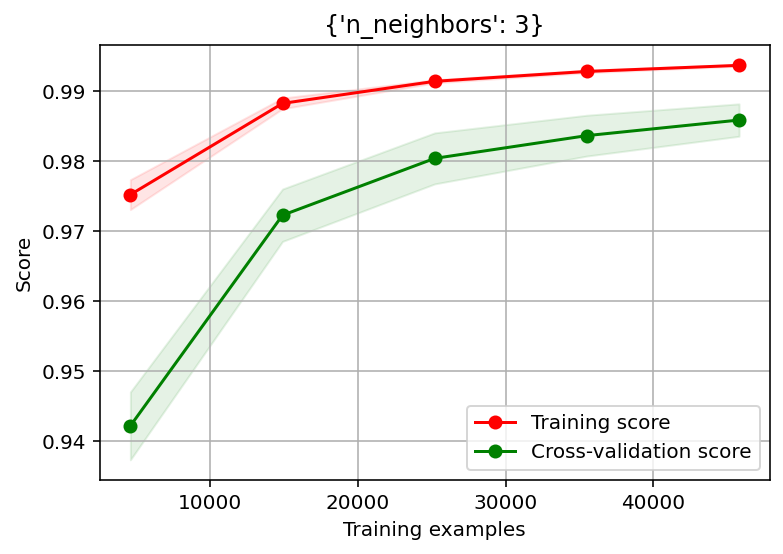

In [77]:
plot_learning_curve(reg, str(gs.best_params_), X, y,
cv=ShuffleSplit(n_splits=10));

In [0]:
def plot_validation_curve(estimator, title, X, y,param_name, param_range, cv,
    scoring="accuracy"):
  train_scores, test_scores = validation_curve(
  estimator, X, y, param_name=param_name,
  param_range=param_range,
  cv=cv, scoring=scoring, n_jobs=-1)
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)
  plt.title(title)
  plt.xlabel(param_name)
  plt.ylabel("Score")
  plt.ylim(0.0, 1.1)
  lw = 2
  plt.plot(param_range, train_scores_mean, label="Training score",
  color="darkorange", lw=lw)
  plt.fill_between(param_range, train_scores_mean - train_scores_std,
  train_scores_mean + train_scores_std, alpha=0.2,
  color="darkorange", lw=lw)
  plt.plot(param_range, test_scores_mean,
  label="Cross-validation score",
  color="navy", lw=lw)
  plt.fill_between(param_range, test_scores_mean - test_scores_std,
  test_scores_mean + test_scores_std, alpha=0.2,
  color="navy", lw=lw)
  plt.legend(loc="best")
  return plt

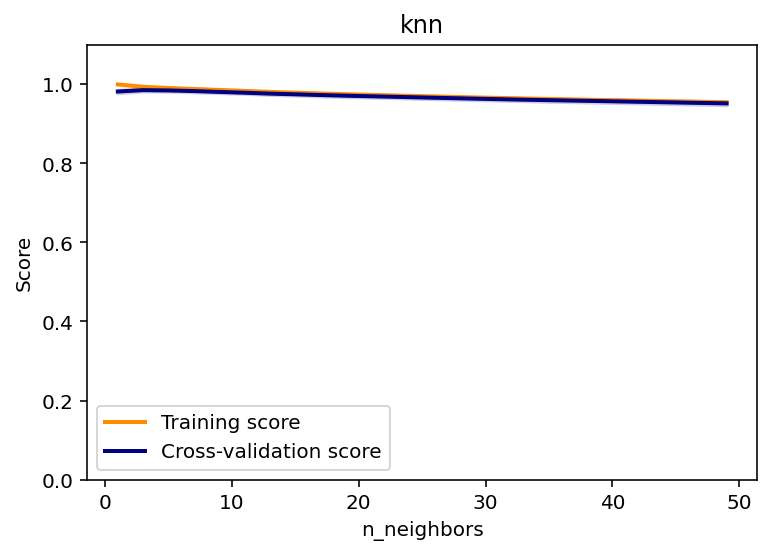

In [79]:
plot_validation_curve(KNeighborsRegressor(), "knn", X, y,
param_name="n_neighbors", param_range=n_range,
cv=ShuffleSplit(n_splits=10), scoring="r2");